# Stochastic Calculus Assignment


### Author: Pedro Henrique Rezende Oliveira


We consider a stock with current value S $=$ 100, and a European put on thatstock with maturity 1 year, and strike 100. We assume that the risk free rate isequal to 0.5$\%$ (continuously compounded rate).Compute the price of a European put within a Cox-Ross-Rubinstein model with volatility $\sigma= 16 \%$, and increase the number of time steps, in order to study the convergence of that price to the price of the same put within Black-Scholesmodel (with same volatility parameter).What happens in terms of convergence speed if the volatility becomes $30\%$ ?And if the strike is now 130?

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
#import math as ma
#import copy
import seaborn as sns
sns.set()

In [2]:
def nCr(n,c):
    if n == c or c == 0:
        return 1
    h = n-c+1
    a = 1
    for i in range(n+1):
        if i !=0:
            a = a*i
    b=1
    for j in range(c+1):
        if j != 0:
            b = b*j
    c=1
    for k in range(h):
        if k != 0:
            c = c*k
    return a/(b*c)


In [3]:
# The function does not handle big numbers.
def nCr2(n,c):
    if n<c:
        raise Exception("c is below n")
    elif n<0 or c<0:
        raise Exception("n and c must be positive integers")
    if n == c or c == 0:
        return 1
    a = np.cumprod(np.arange(n-c+1,n+1))[-1]
    b = np.cumprod(np.arange(1, c+1))[-1]
    return a/b
nCr2(100,4)





3921225.0

In [4]:
def Bs_Put(s = 100,T = 1,n = 1,rf = 0.05, k = 100,sigma= 0.16):
    """Function to calculate the Black and scholes model for european put"""
    dt = 1/n
    crf = np.exp(0.05*dt)
    u = np.exp(rf*(dt**0.5))
    d = 1/u
    p = (np.exp(0.05*dt) - d)/(u-d)
    d1 = ( np.log(s/k) + (rf+1/2 * sigma**2))/sigma
    d2 = d1 - sigma
    put = -s * st.norm.cdf(-d1) + k * np.exp(-rf*1)*st.norm.cdf(-d2)
    return put

In [5]:
def option_bin(s = 100,T = 1,n = 1,rf = 0.05,k = 100,sigma= 0.16):
    """Function to calculate the Cox-Ross-Rubinstein model for european put"""
    dt = T/n
    crf = np.exp(rf)
    u = np.exp(sigma*(dt**0.5))
    d = 1/u
    p = (np.exp(0.05*dt) - d)/(u-d)
    put = 0 

    for i in range(n+1):
        put = put + (p**i)*((1-p)**(n-i)) * nCr(n,i) * np.maximum(-s*(u**i) * (d **(n-i)) + k,0)
    
    return put * 1/(crf**T)


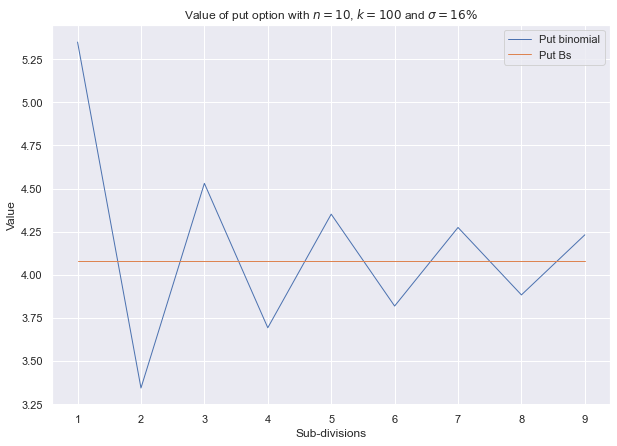

In [6]:
n = np.arange(1,10)
val = [option_bin(n=i) for i in n]
bs = [Bs_Put() for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=10$, $k = 100$ and $\sigma = 16\%$")
ax.grid(True, zorder=-5)

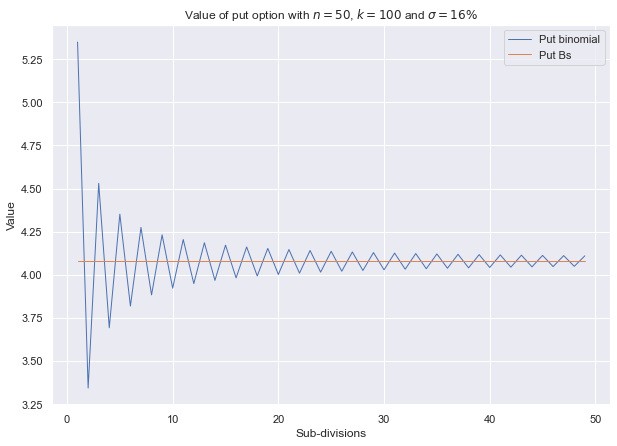

In [7]:
n = np.arange(1,50)
val = [option_bin(n=i) for i in n]
bs = [Bs_Put() for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=50$, $k = 100$ and $\sigma = 16\%$")
ax.grid(True, zorder=-5)

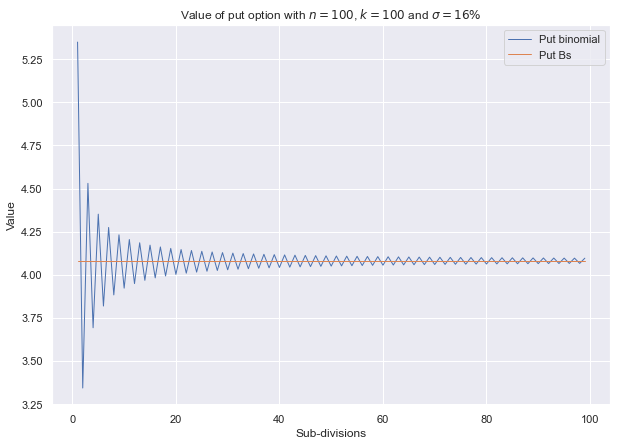

In [8]:
n = np.arange(1,100)
val = [option_bin(n=i) for i in n]
bs = [Bs_Put() for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=100$, $k = 100$ and $\sigma = 16\%$")
ax.grid(True, zorder=-5)

In the graph above we can note the price of binomial model variate over the black scholes(BS) price. The price of binomial model tends to be BS price when the subdivisions increase.

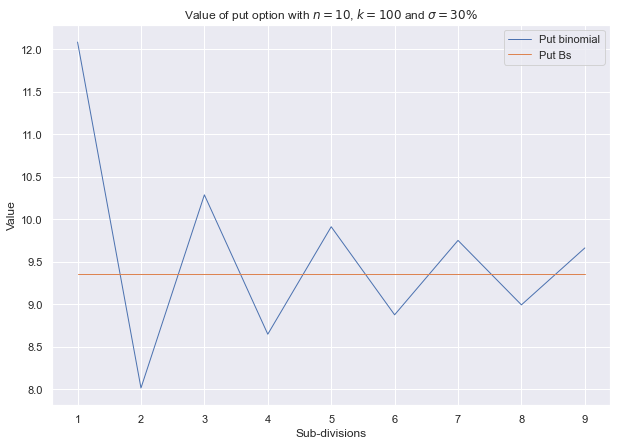

In [9]:
n = np.arange(1,10)
val = [option_bin(n=i, sigma = 0.3) for i in n]
bs = [Bs_Put(sigma = 0.3) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=10$, $k = 100$ and $\sigma = 30\%$")
ax.grid(True, zorder=-5)

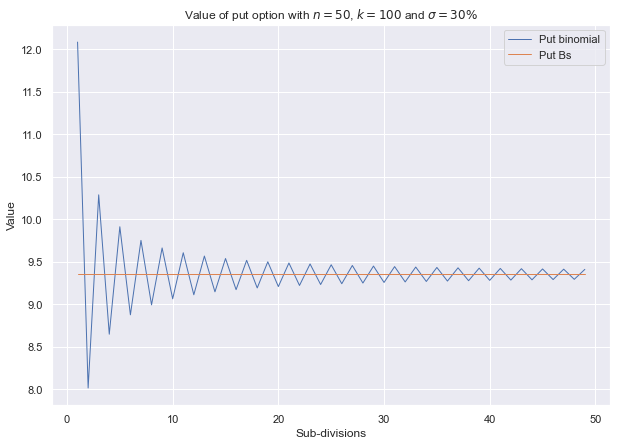

In [10]:
n = np.arange(1,50)
val = [option_bin(n=i, sigma = 0.3) for i in n]
bs = [Bs_Put(sigma = 0.3) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=50$, $k = 100$ and $\sigma = 30\%$")
ax.grid(True, zorder=-5)

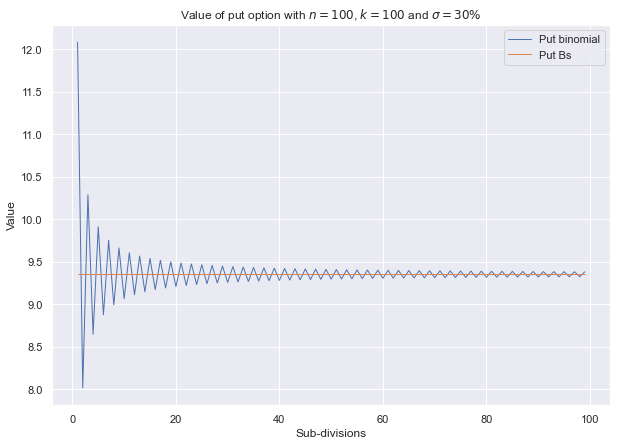

In [11]:
n = np.arange(1,100)
val = [option_bin(n=i, sigma = 0.3) for i in n]
bs = [Bs_Put(sigma = 0.3) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=100$, $k = 100$ and $\sigma = 30\%$")
ax.grid(True, zorder=-5)

In this graph, because the bigger volatility than the first one we can see a big difference between the BS and binomial model. However the price converge to the Bs price in a slow way comparing to the first one.

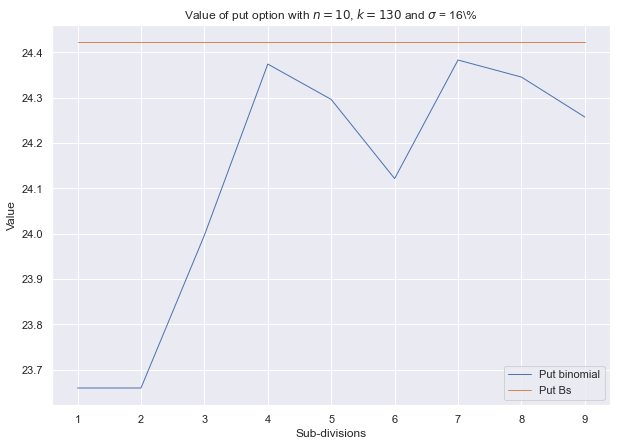

In [12]:
n = np.arange(1,10)
val = [option_bin(n=i, k = 130, sigma = 0.16) for i in n]
bs = [Bs_Put(k = 130, sigma = 0.16) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n = 10$, $k = 130$ and $\sigma$ = 16\%")
ax.grid(True, zorder=-5)

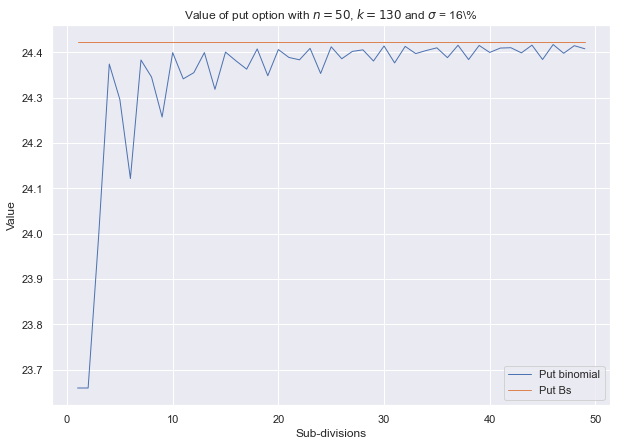

In [13]:
n = np.arange(1,50)
val = [option_bin(n=i, k = 130, sigma = 0.16) for i in n]
bs = [Bs_Put(k = 130, sigma = 0.16) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n = 50$, $k = 130$ and $\sigma$ = 16\%")
ax.grid(True, zorder=-5)

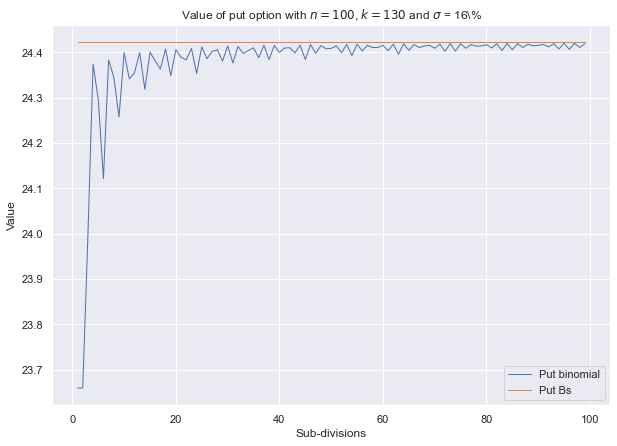

In [14]:
n = np.arange(1,100)
val = [option_bin(n=i, k = 130, sigma = 0.16) for i in n]
bs = [Bs_Put(k = 130, sigma = 0.16) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n = 100$, $k = 130$ and $\sigma$ = 16\%")
ax.grid(True, zorder=-5)

In this case the binomial price doesn't cross the Bs price, but tangency when the subdivions are large or when $n = \infty$.

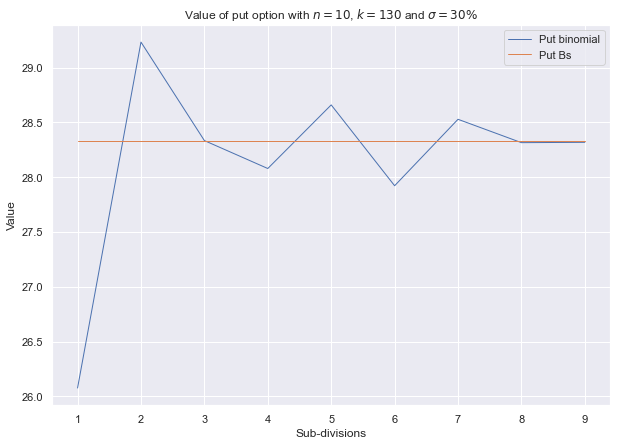

In [15]:
n = np.arange(1,10)
val = [option_bin(n=i, k = 130, sigma = 0.3) for i in n]
bs = [Bs_Put(k = 130, sigma = 0.3) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=10$, $k=130$ and $\sigma = 30\%$")
ax.grid(True, zorder=-5)

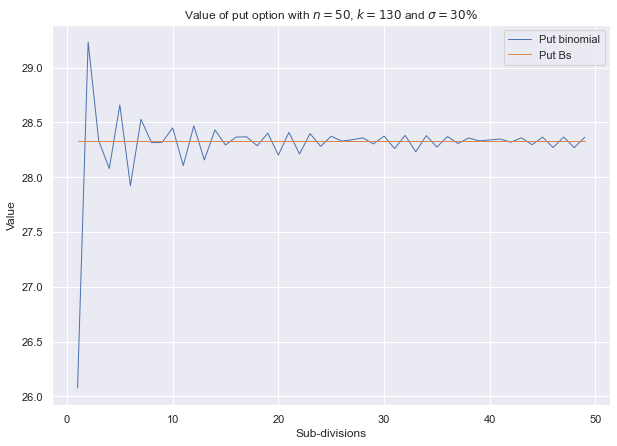

In [16]:
n = np.arange(1,50)
val = [option_bin(n=i, k = 130, sigma = 0.3) for i in n]
bs = [Bs_Put(k = 130, sigma = 0.3) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=50$, $k=130$ and $\sigma = 30\%$")
ax.grid(True, zorder=-5)

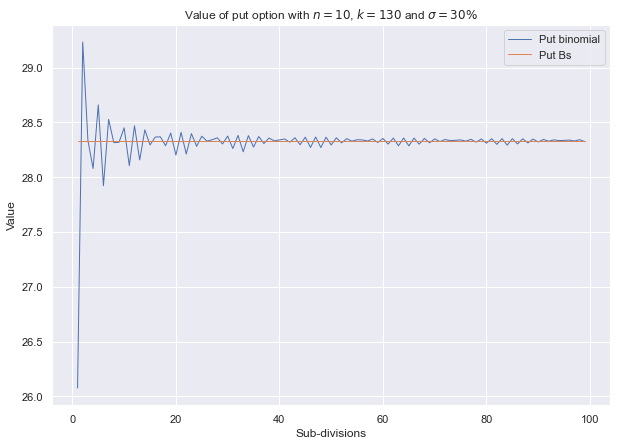

In [17]:
n = np.arange(1,100)
val = [option_bin(n=i, k = 130, sigma = 0.3) for i in n]
bs = [Bs_Put(k = 130, sigma = 0.3) for i in n]
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111)
ax.plot(n, val,lw=1, label='Put binomial', zorder=3)
ax.plot(n, bs,lw=1, label='Put Bs', zorder=3)
ax.legend(loc='best')
ax.set_xlabel('Sub-divisions')
ax.set_ylabel('Value')
ax.set_title("Value of put option with $n=10$, $k=130$ and $\sigma = 30\%$")
ax.grid(True, zorder=-5)

Last graph, taking the binomial price the graph show some kind of cyclic volatility around the Bs price. However when the subdivisions increases the volatility around the bs price decrease. Similar to the previous graph we can see some big jumps or big difference when the subdivions are low specially when they are between 1 to 3 or 4. This graph is special because the binomial model in some subdivisions stabilize at binomial price but increasing or decreasing theses subdivisions the binomial model turns back to variate between the bs model.